<a href="https://colab.research.google.com/github/udayLab/PAMI/blob/main/notebooks/periodicFrequentPattern/basic/PFPMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Periodic Frequent patterns in Temporal Databases using PFPMC

This tutorial has two parts. In the first part, we describe the basic approach to find Periodic Frequent patterns in a temporal database using the PFPMC algorithm. In the final part, we describe an advanced approach, where we evaluate the PFPMC algorithm on a dataset at different minimum support threshold values.
***

# Prerequisites:

1.   Installing the PAMI library

In [ ]:
!pip install -U pami #install the pami repository

2.   Downloading a sample dataset

In [ ]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv #download a sample temporal database

--2023-11-16 13:36:02--  https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.31.244.160, 150.95.161.176
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.31.244.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606762 (4.4M) [text/csv]
Saving to: ‘Temporal_T10I4D100K.csv’

Temporal_T10I4D100K 100%[===================>]   4.39M  1007KB/s    in 6.9s    

2023-11-16 13:36:10 (654 KB/s) - ‘Temporal_T10I4D100K.csv’ saved [4606762/4606762]



3.   Printing few lines of a dataset to know its format.

In [ ]:
!head -2 Temporal_T10I4D100K.csv

1	25	52	164	240	274	328	368	448	538	561	630	687	730	775	825	834
2	39	120	124	205	401	581	704	814	825	834


format: every row contains items seperated by a seperator.

Example:

item1 item2 item3 item4

item1 item4 item6
***

## Part 1: Finding Periodic Frequent patterns using PFPMC

### Step 1: Understanding the statistics of a database to choose an appropriate minimum support (minSup) value.

In [ ]:
#import the class file
import PAMI.extras.dbStats.TemporalDatabase as stats

#specify the file name
inputFile = 'Temporal_T10I4D100K.csv'

#initialize the class
obj=stats.TemporalDatabase(inputFile,sep='\t')

#execute the class
obj.run()

#Printing each of the database statistics
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

#saving the distribution of items' frequencies and transactional lengths
itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(itemFrequencies, 'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')

#Alternative apporach to print all of the database statistics and plot them
# obj.printStats()
# obj.plotGraphs()

Database size : 99913
Total number of items : 870
Database sparsity : 0.9883887027691103
Minimum Transaction Size : 1
Average Transaction Size : 10.10182859087406
Maximum Transaction Size : 29
Standard Deviation Transaction Size : 3.667115963877195
Variance in Transaction Sizes : 13.447874088362232


### Step 2: Draw the item's frequency graph and transaction length's distribution graphs for more information

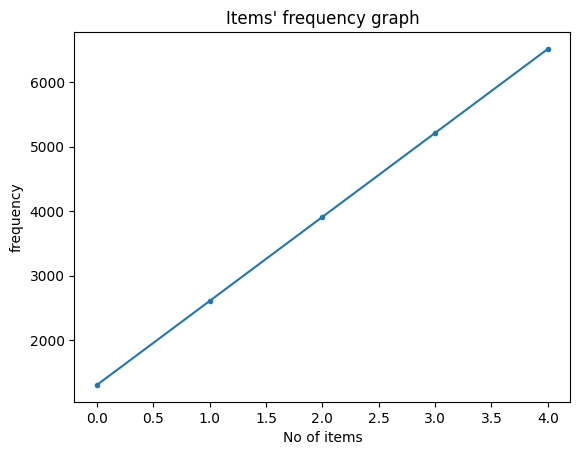

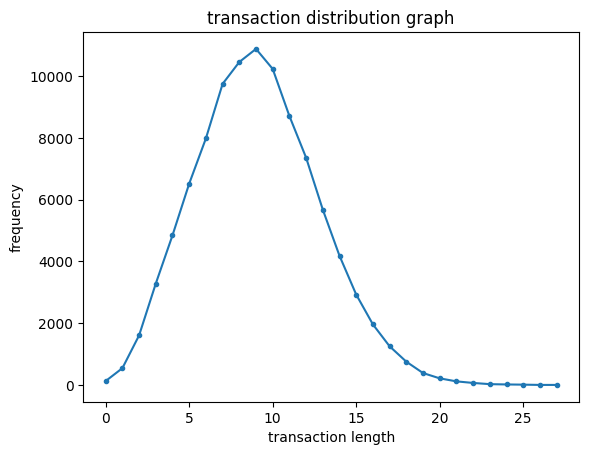

In [ ]:
import PAMI.extras.graph.plotLineGraphFromDictionary as plt

itemFrequencies = obj.getFrequenciesInRange()
transactionLength = obj.getTransanctionalLengthDistribution()
plt.plotLineGraphFromDictionary(itemFrequencies, end = 100, title = 'Items\' frequency graph', xlabel = 'No of items', ylabel= 'frequency')
plt.plotLineGraphFromDictionary(transactionLength, end = 100, title = 'transaction distribution graph', xlabel = 'transaction length', ylabel = 'frequency')

### Step 3: Choosing an appropriate *minSup* value

_Observations_

  1. The input dataset is sparse as the sparsity value is 0.988 (=98.8%)
  2. Many items have low frequencies as seen in the items' frequency graph
  3. The dataset is not high dimensional as the inverted curve is around 10.

  Based on the above observations, let us choose a _minSup_ value of 3000 (in count). We can increase or decrease the _minSup_ based on the number of patterns being generated.

In [ ]:
minimumSupportCount = 3000  #minSup is specified in count. However, the users can also specify minSup between 0 and 1.
maximumPeriodCount = 4000  #maximumPeriodCount is specified in count. However, the users can also specify maximumPeriodCount between 0 and 1.

### Step 4: Mining Periodic Frequent patterns using PFPMC

In [ ]:
from PAMI.periodicFrequentPattern.basic import PFPMC  as alg #import the algorithm

obj = alg.PFPMC(iFile=inputFile, minSup=minimumSupportCount, maxPer=maximumPeriodCount, sep='\t') #initialize
obj.mine()            #start the mining process

obj.save('periodicFrequentPatternsAtMinSupCount3000.txt') #save the patterns


frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 
Total No of patterns: 60
Runtime: 98.44582390785217
Memory (RSS): 498446336
Memory (USS): 481484800


### Step 5: Investigating the generated patterns

Open the pattern's file and investigate the generated patterns. If the generated patterns were interesting, use them; otherwise, redo the Steps 3 and 4 with a different _minSup_ value.

In [ ]:
!head 'periodicFrequentPatternsAtMinSupCount3000.txt'

368:7818:113 
538:3981:283 
775:3766:228 
825:3082:271 
39:4252:236 
120:4968:174 
205:3602:231 
401:3665:277 
895:3380:255 
937:4675:201 


The storage format is: _periodicfrequentPattern:support_
***

## Part 2: Evaluating the PFPMC algorithm on a dataset at different minSup values

### Step 1: Import the libraries and specify the input parameters

In [ ]:
#Import the libraries
from PAMI.periodicFrequentPattern.basic import PFPMC  as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'Temporal_T10I4D100K.csv'
seperator='\t'
maximumPeriodCount = 4000
minimumSupportCountList = [3000, 3500, 4000, 4500, 5000]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

### Step 2: Create a data frame to store the results of PFPMC

In [ ]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'maximumPeriodCount', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PFPMC algorithm

### Step 3: Execute the algorithm at different minSup values

In [ ]:
for minSupCount in minimumSupportCountList:
    obj = alg.PFPMC(inputFile, minSup=minSupCount, maxPer=maximumPeriodCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['PFPMC', minSupCount, maximumPeriodCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 
Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 
Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 
Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 
Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 


### Step 4: Print the Result

In [ ]:
print(result)

  algorithm  minSup  maximumPeriodCount  patterns    runtime     memory
0     PFPMC    3000                4000        60  96.989232  502587392
1     PFPMC    3500                4000        40  59.217767  422608896
2     PFPMC    4000                4000        26  41.785200  365383680
3     PFPMC    4500                4000        17  33.114026  328404992
4     PFPMC    5000                4000        10  29.964159  299024384


### Step 5: Visualizing the results

<Axes: xlabel='minSup'>

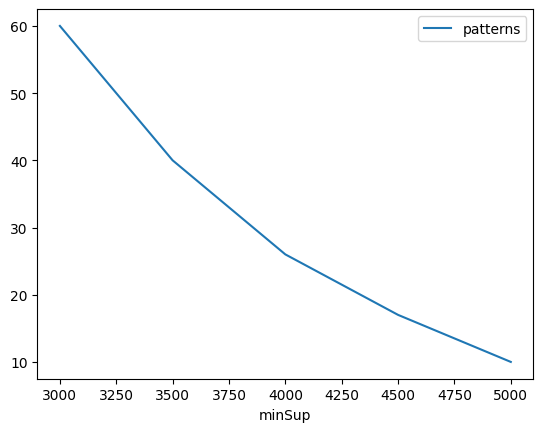

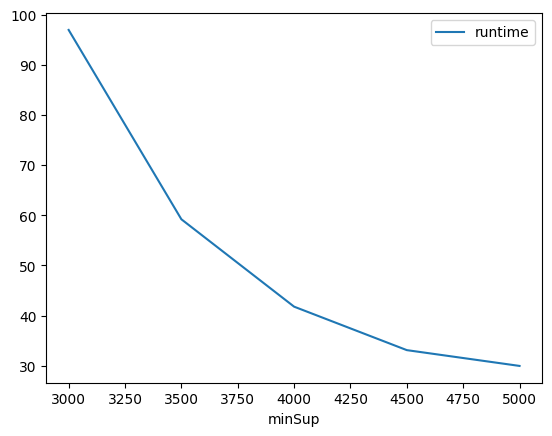

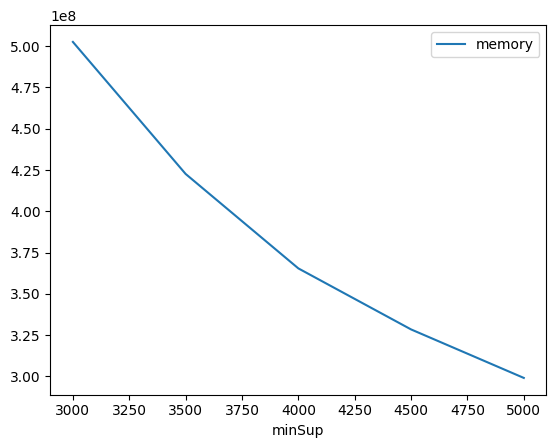

In [ ]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib